# Comparación entre diferentes transformaciones del histograma

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

In [3]:
imagen_bougies = cv2.imread('images/BOUGIES.png', cv2.IMREAD_GRAYSCALE)

In [4]:
def mostrar_histograma(imagen):
    hist = cv2.calcHist([imagen],[0],None,[256],[0,256])
    plt.plot(hist)
    plt.show()

## Imagen (Original)

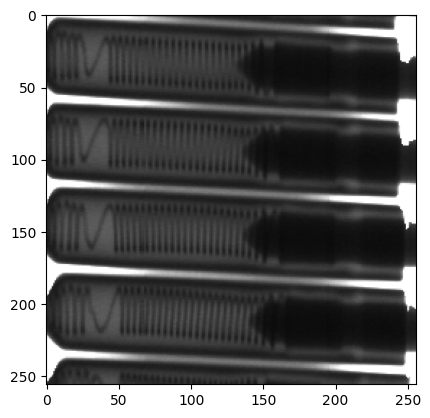

In [5]:
plt.imshow(imagen_bougies, cmap='gray', vmin=0, vmax=255)
plt.show()

## Histograma Imagen (Original)

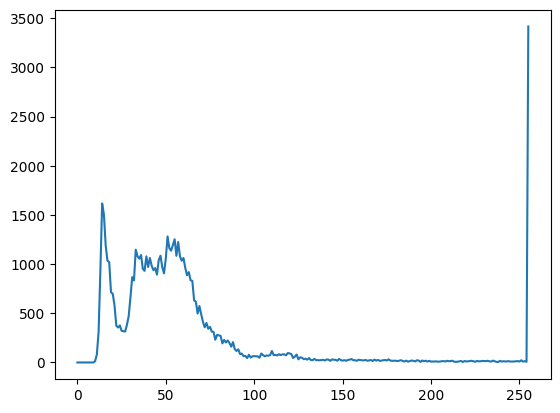

In [6]:
mostrar_histograma(imagen_bougies)

## Expansión del histograma

In [7]:
min_val, max_val, _, _ = cv2.minMaxLoc(imagen_bougies)

min_val, max_val = int(min_val), int(max_val)


In [8]:
def get_ab(li, ls):
    b = ((255 * li)/(li - ls))
    a = (255/(ls - li))
    return a,b

a,b = get_ab(min_val, max_val)

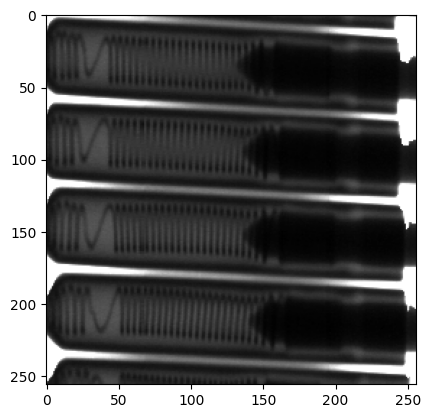

In [9]:
expansion = cv2.convertScaleAbs(imagen_bougies, alpha=a, beta=b)
plt.imshow(expansion, cmap='gray', vmin=0, vmax=255)
plt.show()

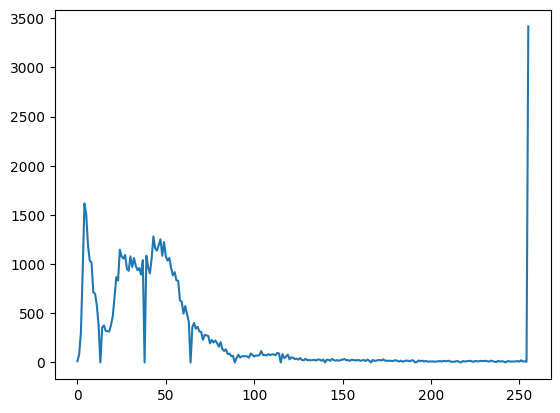

In [10]:
mostrar_histograma(expansion)

### *¿A qué se debe este resultado?*

El resultado se debe a la redistribución de los valores de intensidad, lo que mejoró el contraste, especialmente en las áreas oscuras. Sin embargo, debido a la predominancia de tonos oscuros, el histograma conservó su forma general, aunque con una distribución más equilibrada.

## Ecualización del histograma

In [11]:
imagen_equ = cv2.equalizeHist(imagen_bougies)

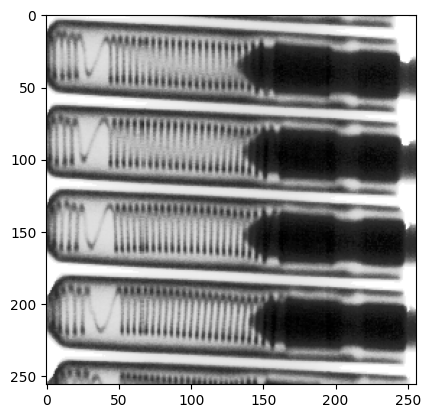

In [12]:
plt.imshow(imagen_equ, cmap='gray', vmin=0, vmax=255)
plt.show()

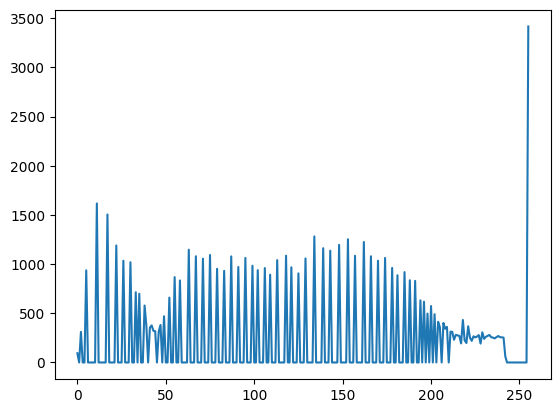

In [13]:
mostrar_histograma(imagen_equ)

### *Comente sus observaciones*

Al ecualizar la imagen, se obtuvo una mejor distribución de las intensidades en el histograma en comparación con la original, lo que mejoró el contraste y la definición. A diferencia de la imagen original, donde las intensidades estaban concentradas en los tonos oscuros, la ecualización permitió una redistribución más equilibrada.

## Transformación logarítmica 

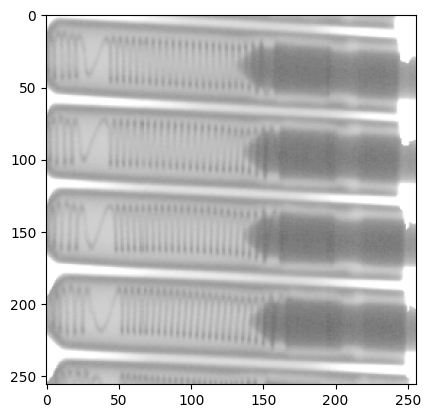

In [27]:
constant_value = 46
logaritmitc_transformation =  np.log1p(imagen_bougies.astype(np.float32))
multiplication = constant_value * logaritmitc_transformation

plt.imshow(multiplication, cmap='gray', vmin=0, vmax=255)
plt.show()

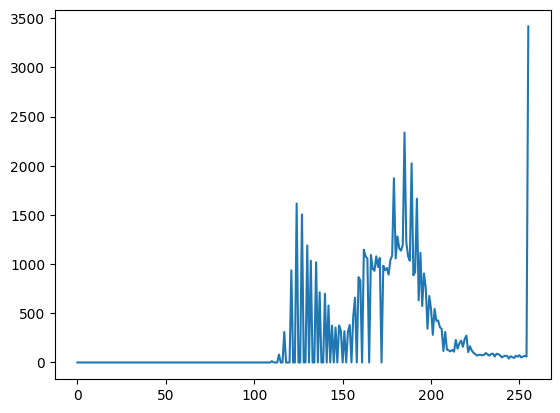

In [25]:
mostrar_histograma(multiplication)

### *¿Por qué es necesario multiplicar la imagen de salida por un factor? Visualice la imagen resultado y su histograma. ¿Cómo es el histograma resultado?*

La transformación logarítmica expande los píxeles oscuros y comprime los brillantes, reduciendo el rango dinámico y oscureciendo la imagen. La multiplicación por un factor reescala las intensidades, recuperando el brillo. En el histograma, esto se refleja en una mayor concentración de valores en las altas intensidades, ya que los píxeles oscuros aumentan su brillo.

## Especificación de histogramas

In [20]:
histograma_original = hist = cv2.calcHist([imagen_bougies],[0],None,[256],[0,256])
hist_normalizado = histograma_original / hist.sum()

N = imagen_bougies.shape[0] 
M = imagen_bougies.shape[1]
L = 256

def get_cdf(hist):
    cdf = np.cumsum(hist)
    pixel_values  = np.interp(np.random.rand(N*M), cdf, range(0,L))
    i_to_match= np.round(pixel_values).astype(np.uint8).reshape(N, M)
    matched_image = exposure.match_histograms(imagen_bougies, i_to_match)
    return i_to_match, matched_image

i_to_match, matched_image = get_cdf(hist_normalizado)


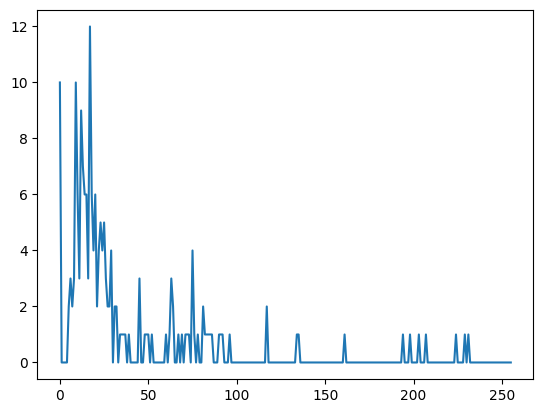

In [21]:
mostrar_histograma(histograma_original)

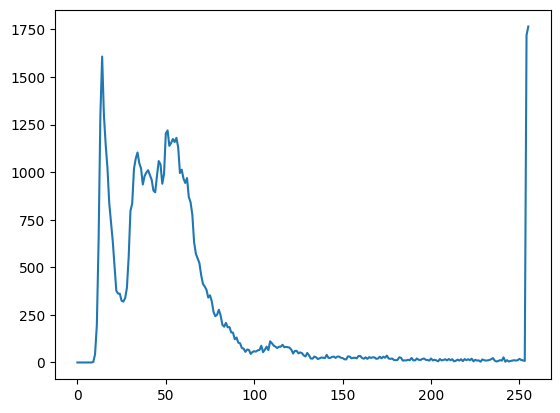

In [17]:
mostrar_histograma(i_to_match)

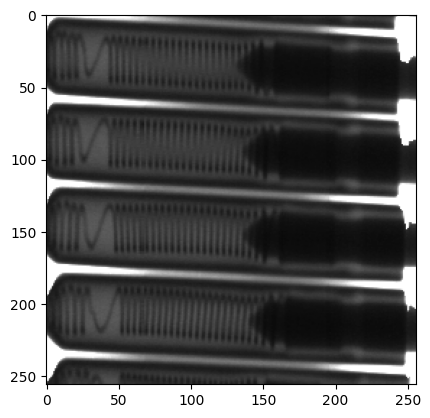

In [79]:
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=255)
plt.show()